## 01. Importing Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib 

In [2]:
# Setting Path
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Data Analytics Immersion/Achievement 6'

In [3]:
# Importing cleaned data set
toronto_listings_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'toronto_cleaned.csv'))

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
toronto_listings_cleaned.head()

,id,scrape_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,listings_count,listings_count_home,listings_count_p_rooms,listings_count_s_rooms,reviews_per_month
0,26654,20240214201029,113345,2010-04-25,100.000000,41.000000,0,1,Waterfront Communities-The Island,43.64608,-79.39032,Entire condo,Entire home/apt,4,1.0,1.0,2.0,"[""Building staff"", ""Microwave"", ""Central air c...",164.0,28,1125,1,0,0,0,115,2024-02-15,42,2,0,4.790000,4.790000,4.790000,4.640000,4.760000,4.860000,4.670000,f,5,5,0,0,0.260000
1,27423,20240214201029,118124,2010-05-04,100.000000,100.000000,0,1,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,1,1.0,0.0,1.0,"[""Free street parking"", ""Microwave"", ""Central ...",75.0,90,365,1,10,13,13,146,2024-02-15,28,1,0,4.930000,5.000000,4.850000,5.000000,5.000000,4.850000,4.850000,f,1,1,0,0,0.170000
2,335446,20240214201029,1704172,2012-02-05,100.000000,100.000000,1,1,Moss Park,43.65744,-79.37228,Private room in condo,Private room,1,1.0,1.0,1.0,"[""Microwave"", ""Central air conditioning"", ""Fre...",100.0,28,1125,1,0,0,2,277,2024-02-15,121,1,0,4.850000,4.720000,4.700000,4.970000,4.960000,4.530000,4.780000,t,2,1,1,0,0.830000
3,339418,20240214201029,1027776,2011-08-27,95.848253,85.081771,0,1,Mount Pleasant West,43.69954,-79.39330,Private room in rental unit,Private room,2,1.0,1.0,0.0,"[""Free street parking"", ""Microwave"", ""Shared s...",60.0,28,90,1,0,0,0,0,2024-02-15,85,0,0,4.500000,4.330000,4.110000,4.590000,4.670000,4.650000,4.360000,f,1,0,1,0,0.580000
4,42892,20240214201029,187320,2010-08-01,100.000000,44.000000,1,1,Waterfront Communities-The Island,43.64450,-79.38019,Entire condo,Entire home/apt,4,2.0,3.0,3.0,"[""Lake access"", ""Long term stays allowed"", ""Ho...",140.0,30,365,1,29,59,89,364,2024-02-15,0,0,0,4.788366,4.810071,4.810071,4.855948,4.867068,4.832452,4.688679,f,12,7,5,0,1.509953


In [6]:
toronto_listings_cleaned['neighbourhood_cleansed'].value_counts(dropna = False)

neighbourhood_cleansed
Waterfront Communities-The Island      2473
Niagara                                 572
Annex                                   466
Trinity-Bellwoods                       384
Church-Yonge Corridor                   377
Bay Street Corridor                     361
Dovercourt-Wallace Emerson-Junction     351
Kensington-Chinatown                    349
Moss Park                               337
Willowdale East                         302
South Riverdale                         277
Little Portugal                         257
Palmerston-Little Italy                 229
Downsview-Roding-CFB                    185
Newtonbrook East                        184
York University Heights                 183
Islington-City Centre West              179
Mimico (includes Humber Bay Shores)     179
The Beaches                             168
Newtonbrook West                        166
South Parkdale                          161
Wexford/Maryvale                        150
High Park

## 02. Exploratory Visual Analysis

In [51]:
%matplotlib inline

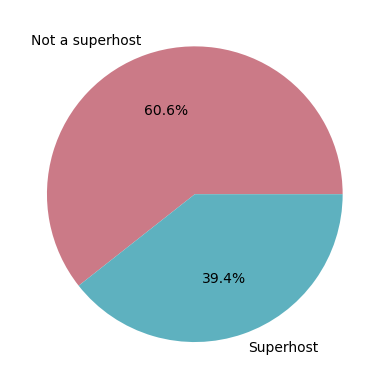

In [7]:
pie_1 = plt.pie(toronto_listings_cleaned['host_is_superhost'].value_counts(),labels=['Not a superhost', 'Superhost'], autopct='%1.1f%%',
       colors = ['#CB7A87', '#5EB1BF'])
plt.show()

Most hosts are not super hosts. 

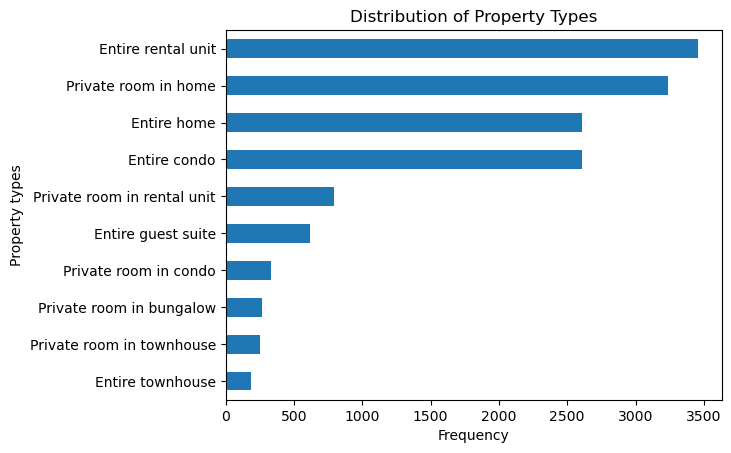

In [8]:
# Distribution of top 10 property types in Toronto
toronto_listings_cleaned['property_type'].value_counts().head(10).sort_values(ascending=True).plot.barh(xlabel = 'Frequency', 
                                                            ylabel = 'Property types',title = 'Distribution of Property Types')
plt.show()

In [9]:
toronto_listings_cleaned['property_type'].value_counts().head(4)

property_type
Entire rental unit      3456
Private room in home    3239
Entire home             2609
Entire condo            2605
Name: count, dtype: int64

Maximum listings are for an entire rental unit followed by Private room in home, followed by condo, followed by home.

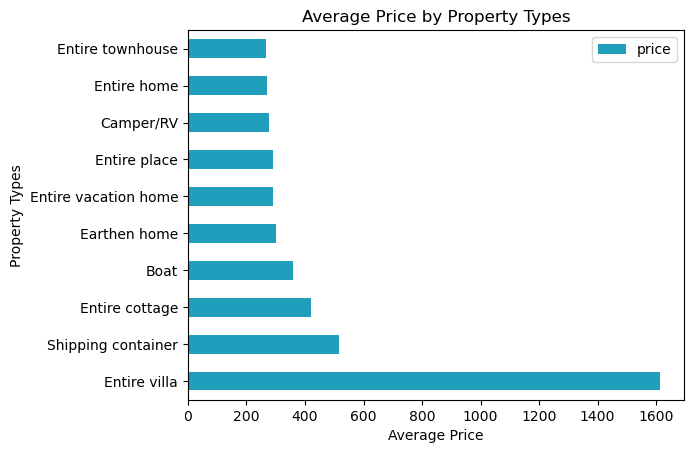

In [10]:
toronto_listings_cleaned.groupby('property_type').agg({'price': 'mean'}).sort_values(by='price',ascending=False).head(10).plot.barh(
    xlabel = 'Average Price', ylabel = 'Property Types', title = 'Average Price by Property Types', color = '#219ebc'
    
)
plt.show()

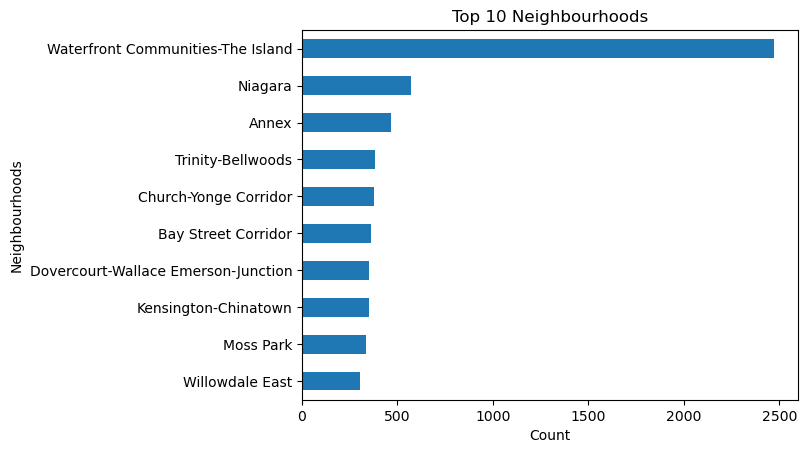

In [11]:
# Top 10 neighbourhoods by listings
neigh_bar = toronto_listings_cleaned['neighbourhood_cleansed'].value_counts(dropna = False).head(10).sort_values(ascending = True).plot.barh(
    title = 'Top 10 Neighbourhoods', xlabel = 'Count', ylabel = 'Neighbourhoods')
plt.show()

**Most populus neightbourhood** for Airbnb listings is **Waterfrom Communities-The Island.**

In [12]:
# Top 10 priced neighbourhoods, using median as metric
t1 = toronto_listings_cleaned.groupby('neighbourhood_cleansed').agg({'price': 'median'}).sort_values(by = 'price', ascending= False).head(10)

<Axes: title={'center': 'Top 10 Priced Neighbourhoods'}, xlabel='Median Price in CAD', ylabel='Neighbourhood'>

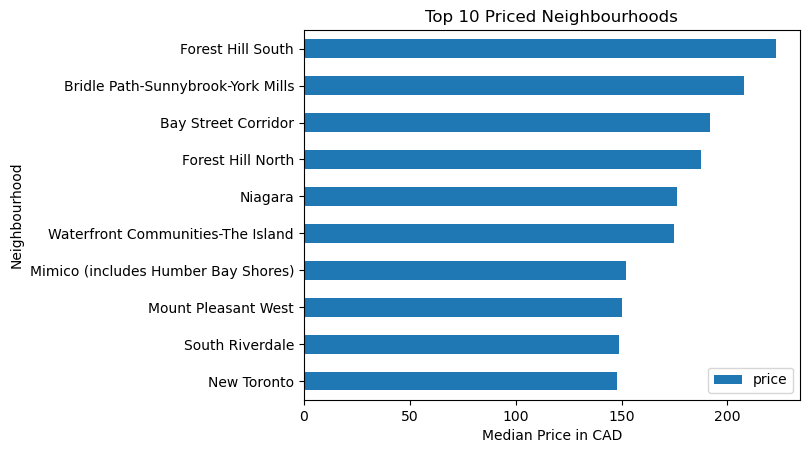

In [13]:
# Plotting t1
t1.sort_values(by = 'price',ascending = True).plot.barh(xlabel = 'Median Price in CAD', ylabel = 'Neighbourhood',
                                                       title = 'Top 10 Priced Neighbourhoods')

Most highly priced neighbourhood is **Forest Hill South.**

In [14]:
# Exploring Relationships between numerical variables
df = toronto_listings_cleaned[['price','accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights','maximum_nights']]

In [15]:
df.corr()

,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights
price,1.000000,0.298453,0.270425,0.264004,0.245164,-0.029381,0.019382
accommodates,0.298453,1.000000,0.581414,0.773022,0.790810,-0.076185,-0.000208
bathrooms,0.270425,0.581414,1.000000,0.661076,0.526591,-0.034627,-0.017527
bedrooms,0.264004,0.773022,0.661076,1.000000,0.747785,-0.044436,-0.006369
beds,0.245164,0.790810,0.526591,0.747785,1.000000,-0.036633,0.000337
minimum_nights,-0.029381,-0.076185,-0.034627,-0.044436,-0.036633,1.000000,0.134163
maximum_nights,0.019382,-0.000208,-0.017527,-0.006369,0.000337,0.134163,1.000000


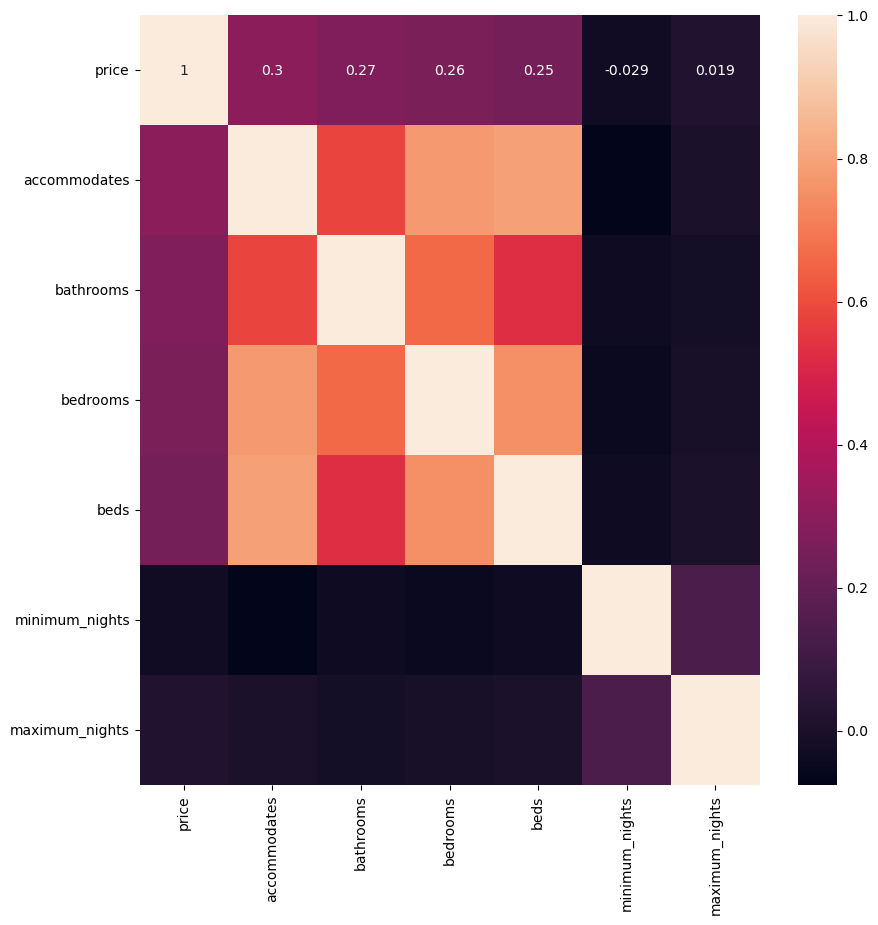

In [16]:
fig,ax = plt.subplots(figsize=(10,10)) # Creating figure and axes

corr_plot_1 = sns.heatmap(df.corr(), annot = True, ax = ax)

1. It appears that price is **weakly correlated** with accommodates, bathrooms, bedrooms, and beds. This could mean that the relationship is non-linear or there are other features that are related to price.
2. As you would expect, **accommondates is strongly correlated** with bathrooms, bedrooms and beds.
3. Minimum and maximum nights have **very weak correlation** with each other and they are not correlated to price.

Let's consider correlation of price with other features is the data frame.

In [17]:
df2 = toronto_listings_cleaned[['price', 'availability_30','availability_60', 'availability_90', 'availability_365', 
                                'number_of_reviews', 'listings_count']]

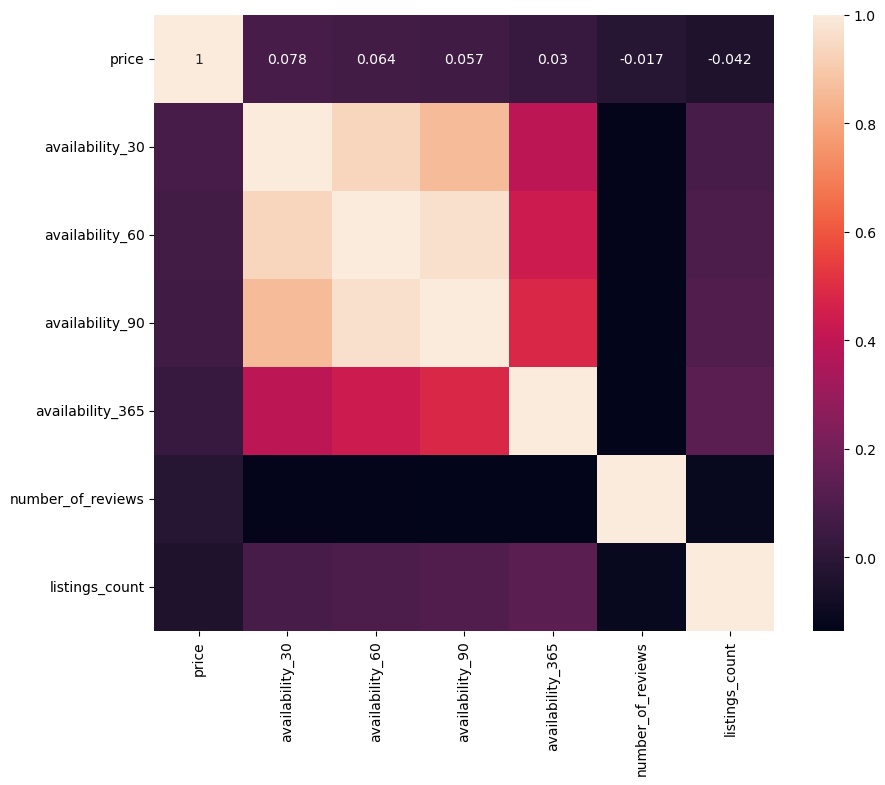

In [18]:
fig,ax = plt.subplots(figsize=(10,8)) # Creating figure and axes

corr_plot_2 = sns.heatmap(df2.corr(), annot = True, ax = ax)

1. Note that **price has near zero correlations** with availability_30, 60, 90, 365, number_of_reviews_calculated_host_listings_count.
2. However, availability_30 has strong correlation with availability_60, and 90. And, moderate correlation with availability_365.

In [19]:
df3 = toronto_listings_cleaned[['price', 'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                                'review_scores_checkin','host_acceptance_rate']]S

In [20]:
df3.corr()

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,host_acceptance_rate
price,1.000000,0.026824,0.022380,0.030596,0.008627,0.023459
review_scores_rating,0.026824,1.000000,0.847452,0.772198,0.704456,0.030922
review_scores_accuracy,0.022380,0.847452,1.000000,0.730536,0.647954,0.024807
review_scores_cleanliness,0.030596,0.772198,0.730536,1.000000,0.576135,0.035336
review_scores_checkin,0.008627,0.704456,0.647954,0.576135,1.000000,0.009178
host_acceptance_rate,0.023459,0.030922,0.024807,0.035336,0.009178,1.000000


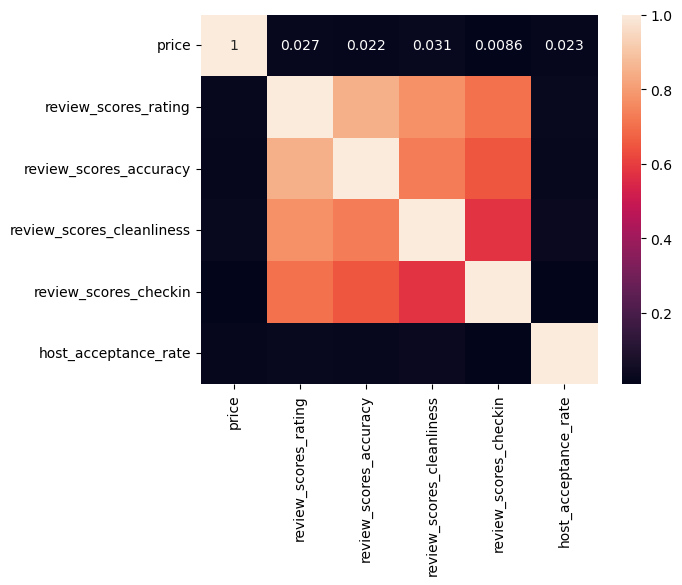

In [29]:
corr_plot_3 = sns.heatmap(df3.corr(),annot = True)

As one would expect review_scores_rating is strongly correlated to other types of ratings. However, price isn't correlated with any of the reviews.

In [34]:
df4 = toronto_listings_cleaned[['price', 'review_scores_rating','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']]

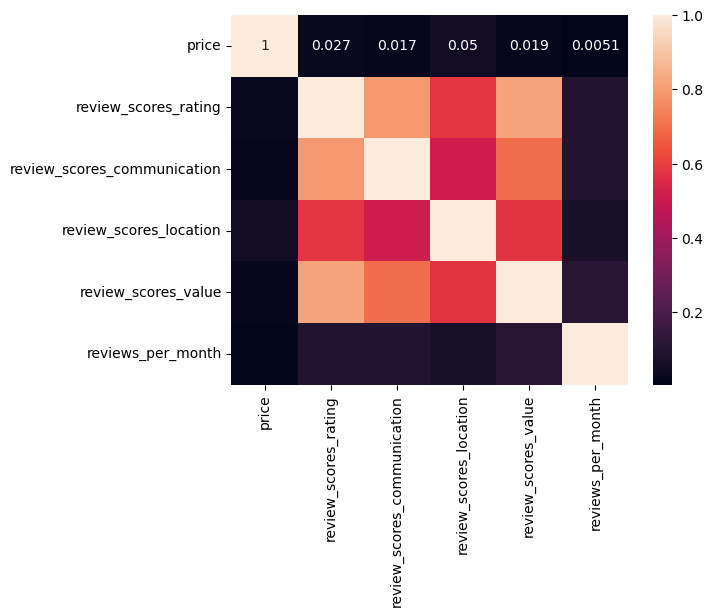

In [35]:
corr_plot_4 = sns.heatmap(df4.corr(),annot = True)

In this plot again, price is not correlated with any variable. But review scores rating is related to other type of reivews.

### Scatter plot of the variables with strong correlation

<Axes: xlabel='accommodates', ylabel='bedrooms'>

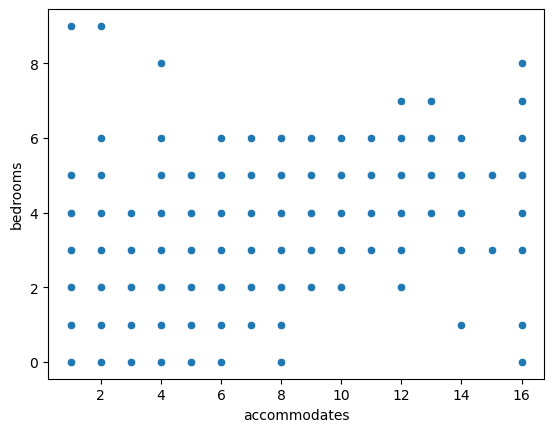

In [19]:
# accommodates and bedrooms
sns.scatterplot(x=toronto_listings_cleaned['accommodates'], y = toronto_listings_cleaned['bedrooms'])

We see that due to discrete nature of the features, the points are evenly spaced. Again, there is an upward trend as expected. The more bedrooms there are the more people can be accommodated.

<Axes: xlabel='accommodates', ylabel='bathrooms'>

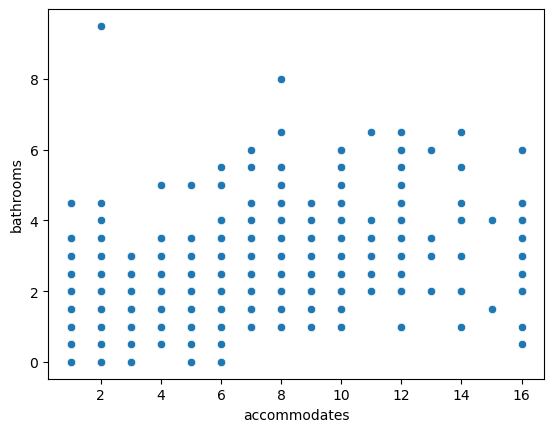

In [20]:
# Bathrooms and accommodates
sns.scatterplot(x=toronto_listings_cleaned['accommodates'], y = toronto_listings_cleaned['bathrooms'])

We see that number of bathrooms increases 7 people onwards. Again, the data is discrete in this case. That is why we are seeing clear segmentation in the graph.

<Axes: xlabel='accommodates', ylabel='beds'>

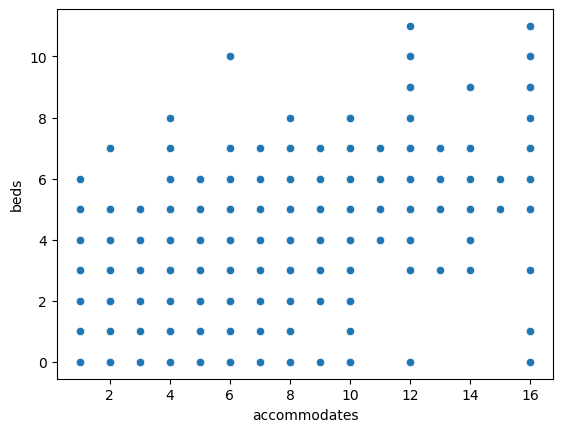

In [21]:
# Accommodates and Beds
sns.scatterplot(x=toronto_listings_cleaned['accommodates'], y = toronto_listings_cleaned['beds'])

Higher number of beds are require to accommodate higher number of people. 

<Axes: xlabel='beds', ylabel='bathrooms'>

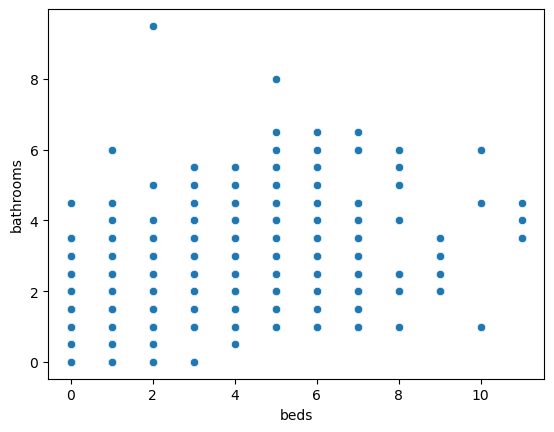

In [22]:
sns.scatterplot(x=toronto_listings_cleaned['beds'], y = toronto_listings_cleaned['bathrooms'])

Number of bathrooms increase 5 people onwards. This is not surprising as more beds would require more bathrooms.

<Axes: xlabel='availability_30', ylabel='availability_60'>

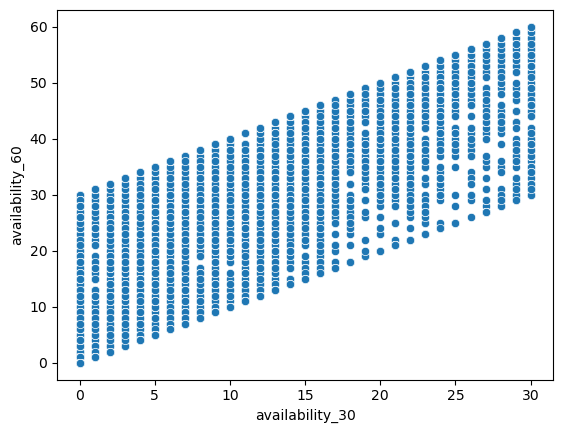

In [23]:
# availability_30 availability_60
sns.scatterplot(x=toronto_listings_cleaned['availability_30'], y = toronto_listings_cleaned['availability_60'])

There is a clear linear trend here. If there are more instance of a listing being available in the next 30 days, there are more intances of the same listing being available in the next 60 days.

<Axes: xlabel='availability_30', ylabel='availability_90'>

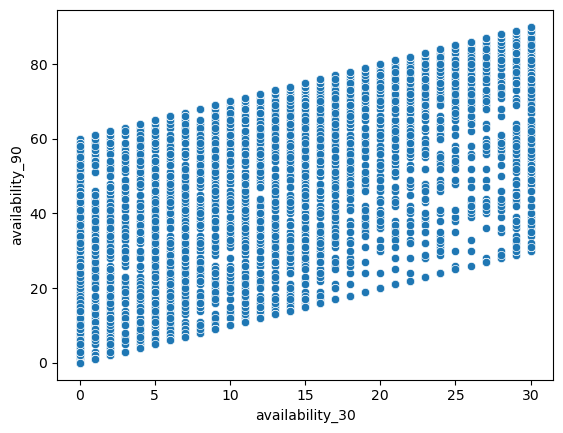

In [24]:
# availability_30 and availability_90
sns.scatterplot(x=toronto_listings_cleaned['availability_30'], y = toronto_listings_cleaned['availability_90'])

Similar, but mildly weaker is the case with availability_30 and availability_90.

<Axes: xlabel='availability_90', ylabel='availability_60'>

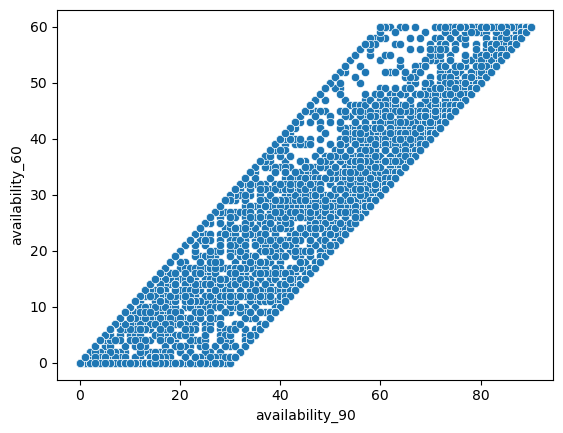

In [25]:
# availabillity_90 and availability_60
sns.scatterplot(x=toronto_listings_cleaned['availability_90'], y = toronto_listings_cleaned['availability_60'])

There is stronger relationship between availability_60 and availability_90. The number of times a listing is available in the next 60 days is highly correlated with number of times the listing is available for the next 90 days.

<Axes: xlabel='review_scores_rating', ylabel='review_scores_accuracy'>

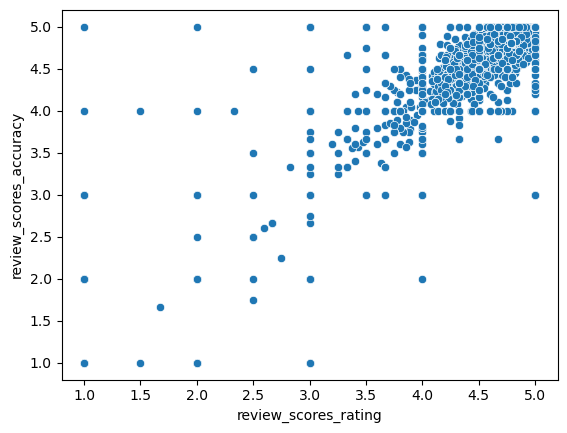

In [38]:
# Review Scores rating and review scores accuracy
sns.scatterplot(x=toronto_listings_cleaned['review_scores_rating'], y = toronto_listings_cleaned['review_scores_accuracy'])

Maximum scores are located at the higher end with a few scattered reviews.

### Pair Plot of the entire dataset

In [39]:
toronto_listings_cleaned.shape

(15312, 43)

Since, there are 43 features, we will select numerical and important features for pairplot to make sure the pair plot is readable.

In [40]:
toronto_listings_cleaned.columns

Index(['id', 'scrape_id', 'host_id', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'listings_count',
       'listings_count_home', 'listings_count_p_rooms',
       'listings_count_s_rooms', 'reviews_per_month'],
      dtype='object')

In [28]:
sub = toronto_listings_cleaned[['accommodates','bathrooms', 'bedrooms', 'beds','price', 'minimum_nights']]

/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

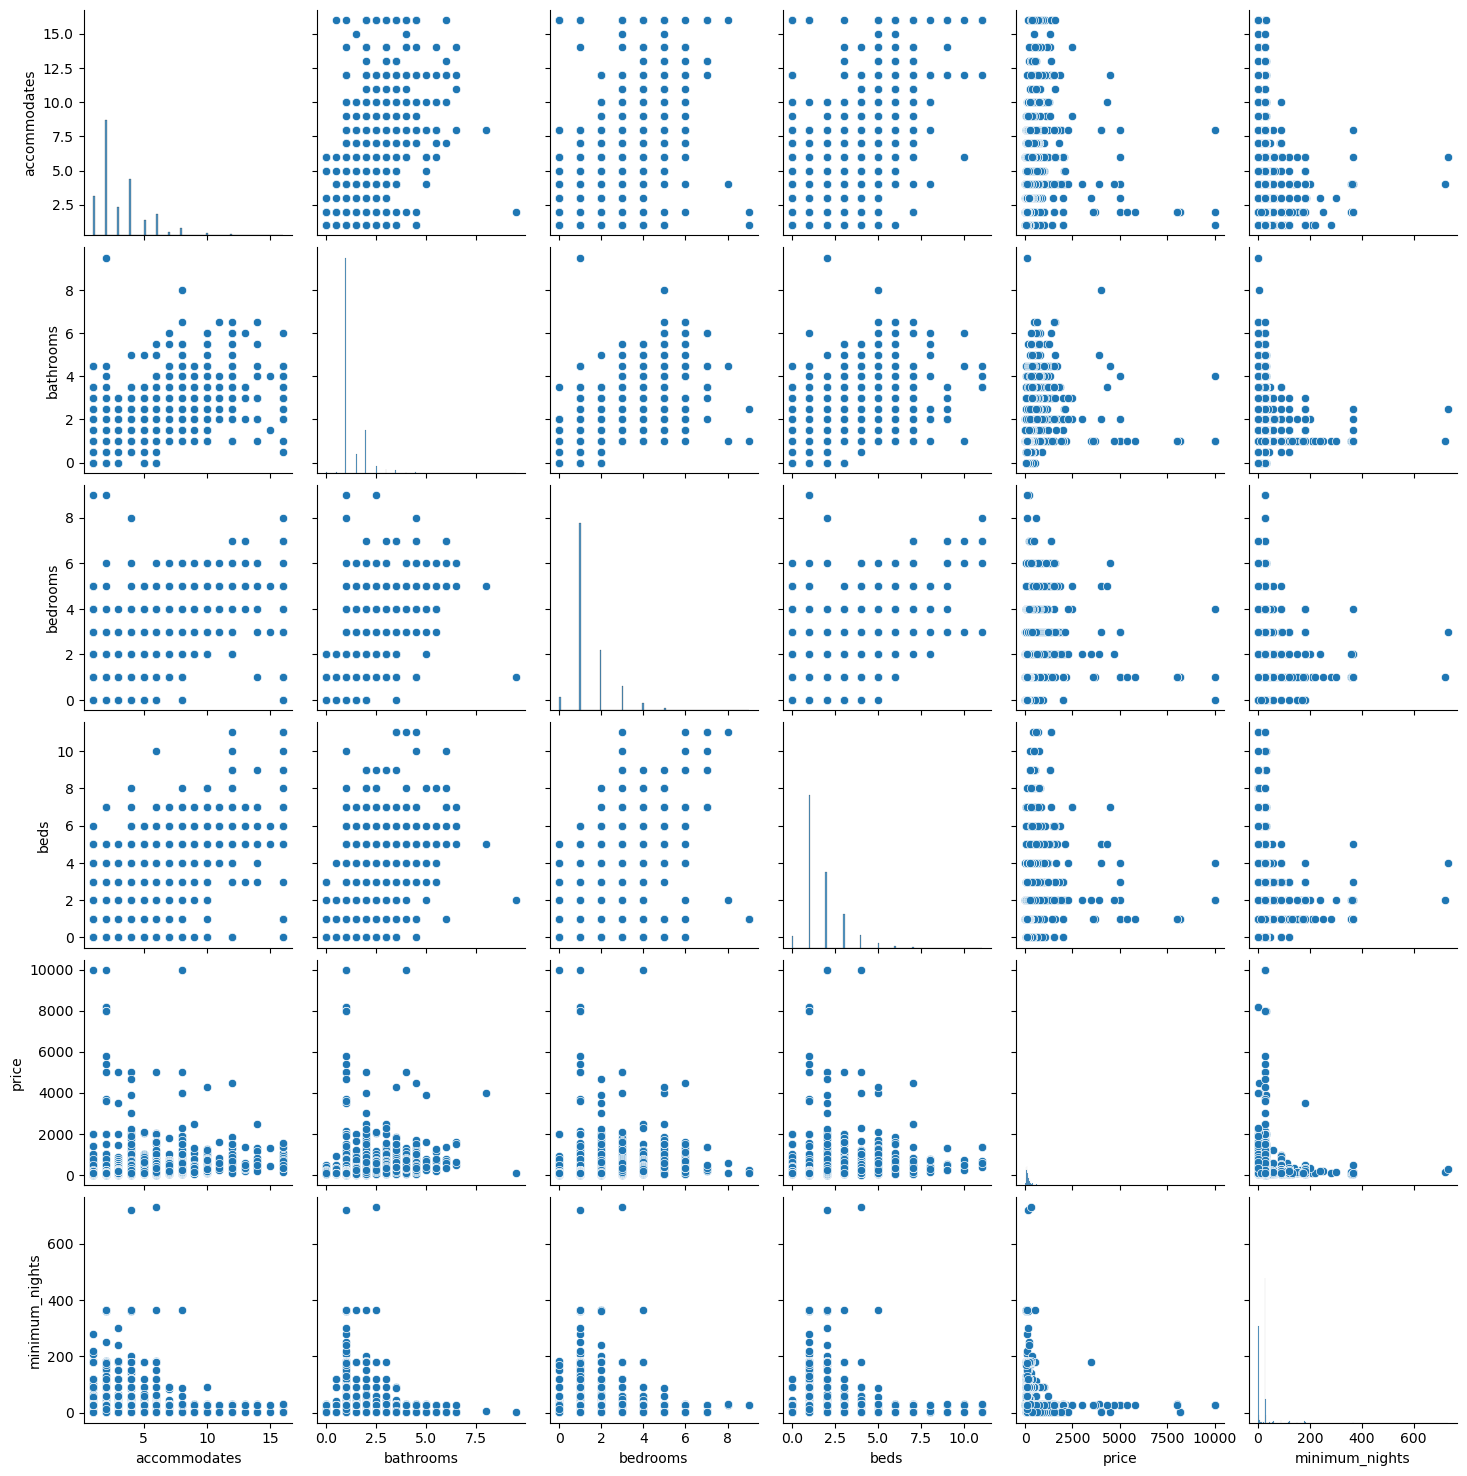

In [29]:
sns.pairplot(sub,)

In [30]:
sub2 = toronto_listings_cleaned[['price', 'minimum_nights','maximum_nights', 'has_availability', 'availability_30','availability_60', 'availability_90', 'availability_365']]

/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

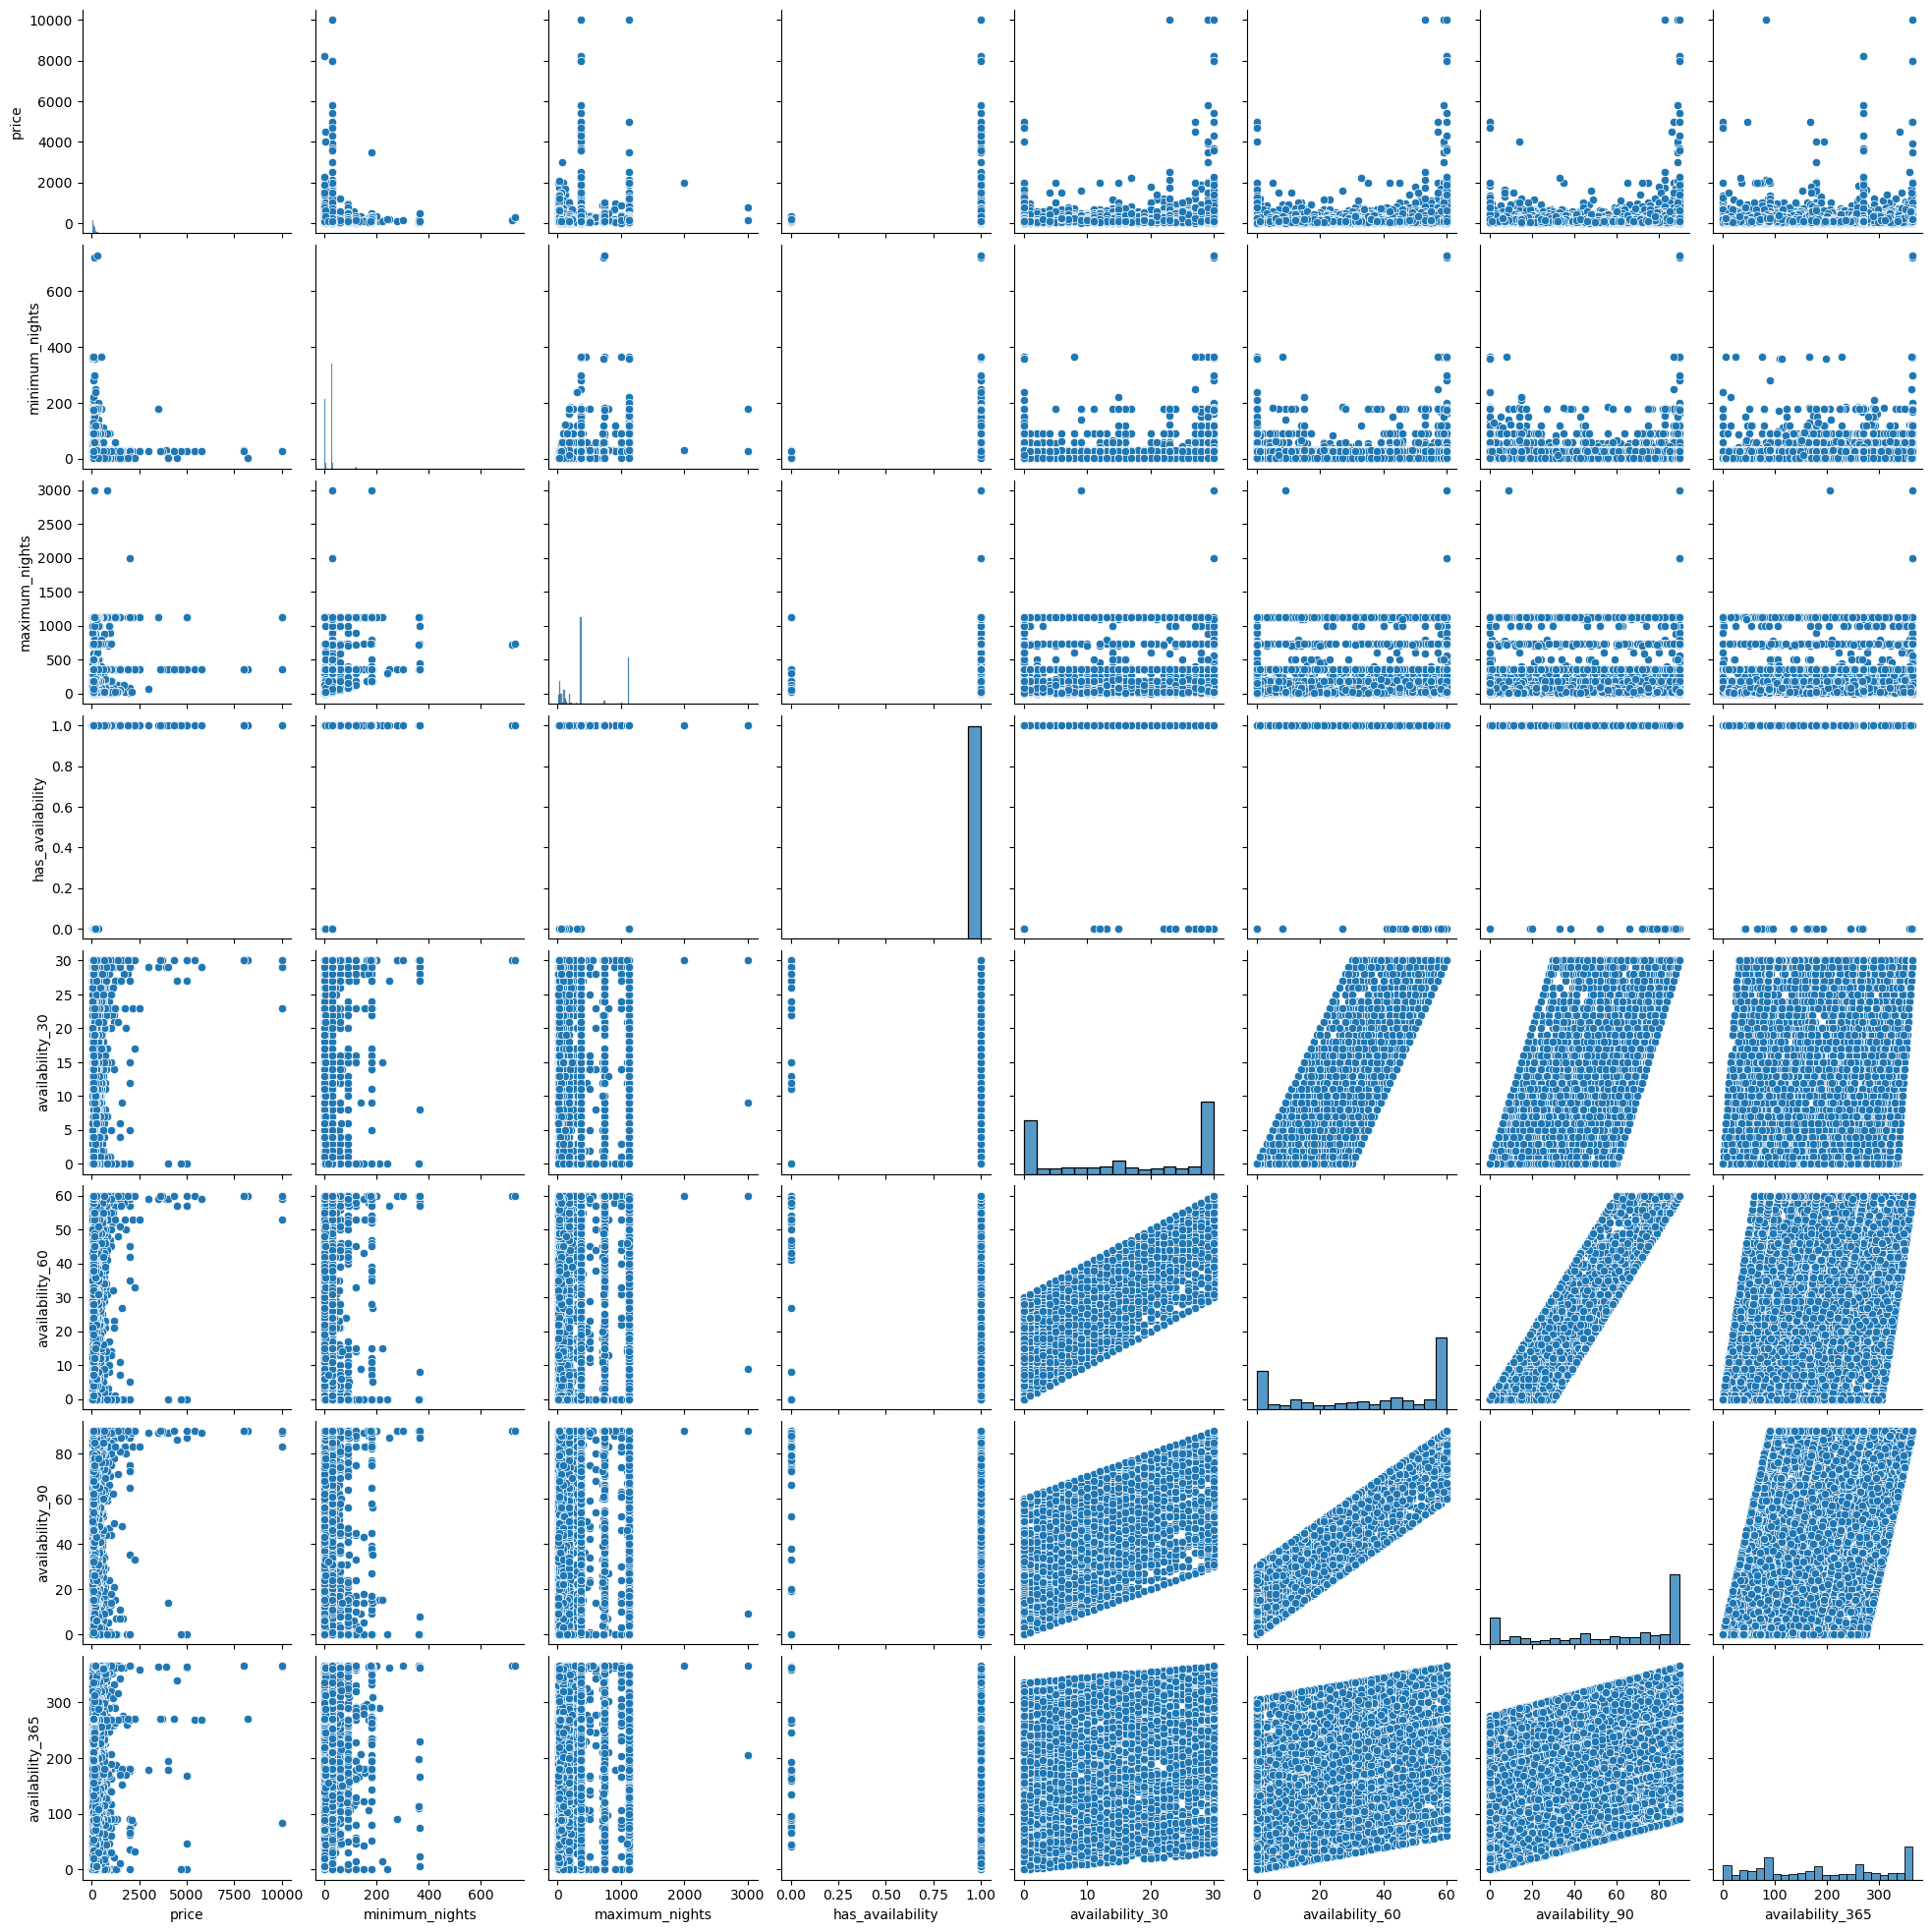

In [31]:
sns.pairplot(sub2)

In [32]:
sub3 = toronto_listings_cleaned[['price','number_of_reviews', 'number_of_reviews_ltm','number_of_reviews_l30d']]

/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

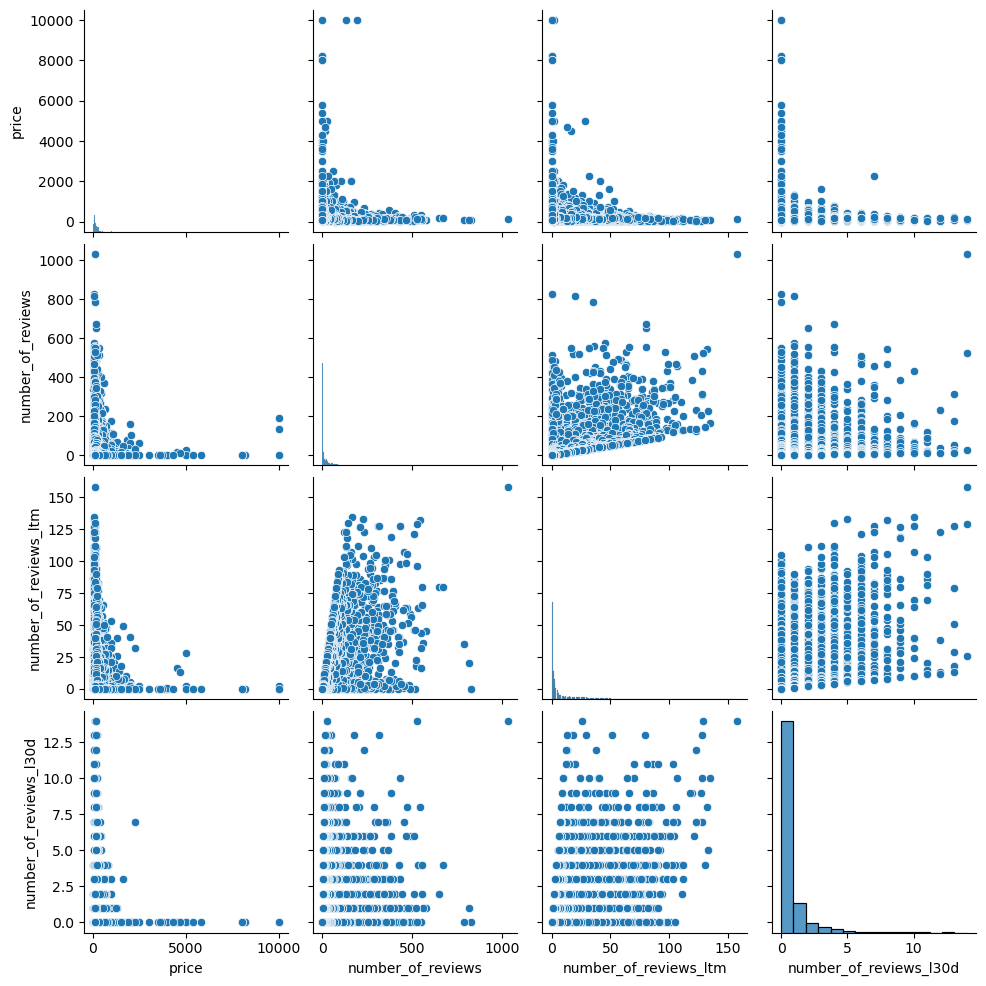

In [33]:
sns.pairplot(sub3)

In [36]:
sub4 = toronto_listings_cleaned[['price','listings_count', 'listings_count_home', 'listings_count_p_rooms', 'listings_count_s_rooms']]

/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

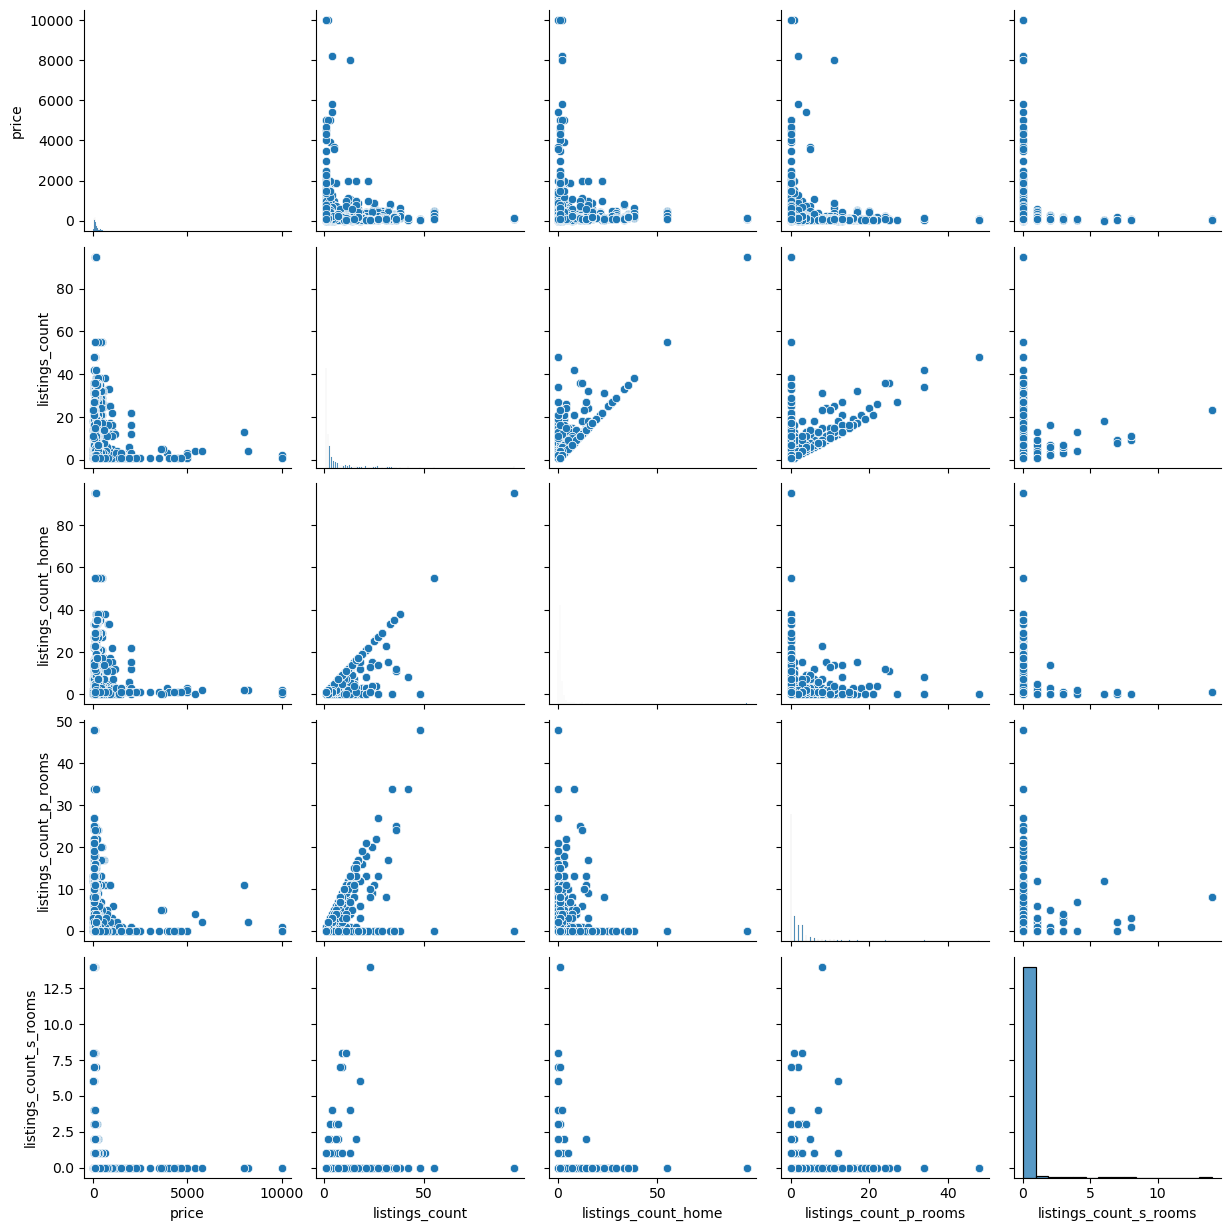

In [37]:
pairplot = sns.pairplot(sub4)


In [41]:
sub5 = toronto_listings_cleaned[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

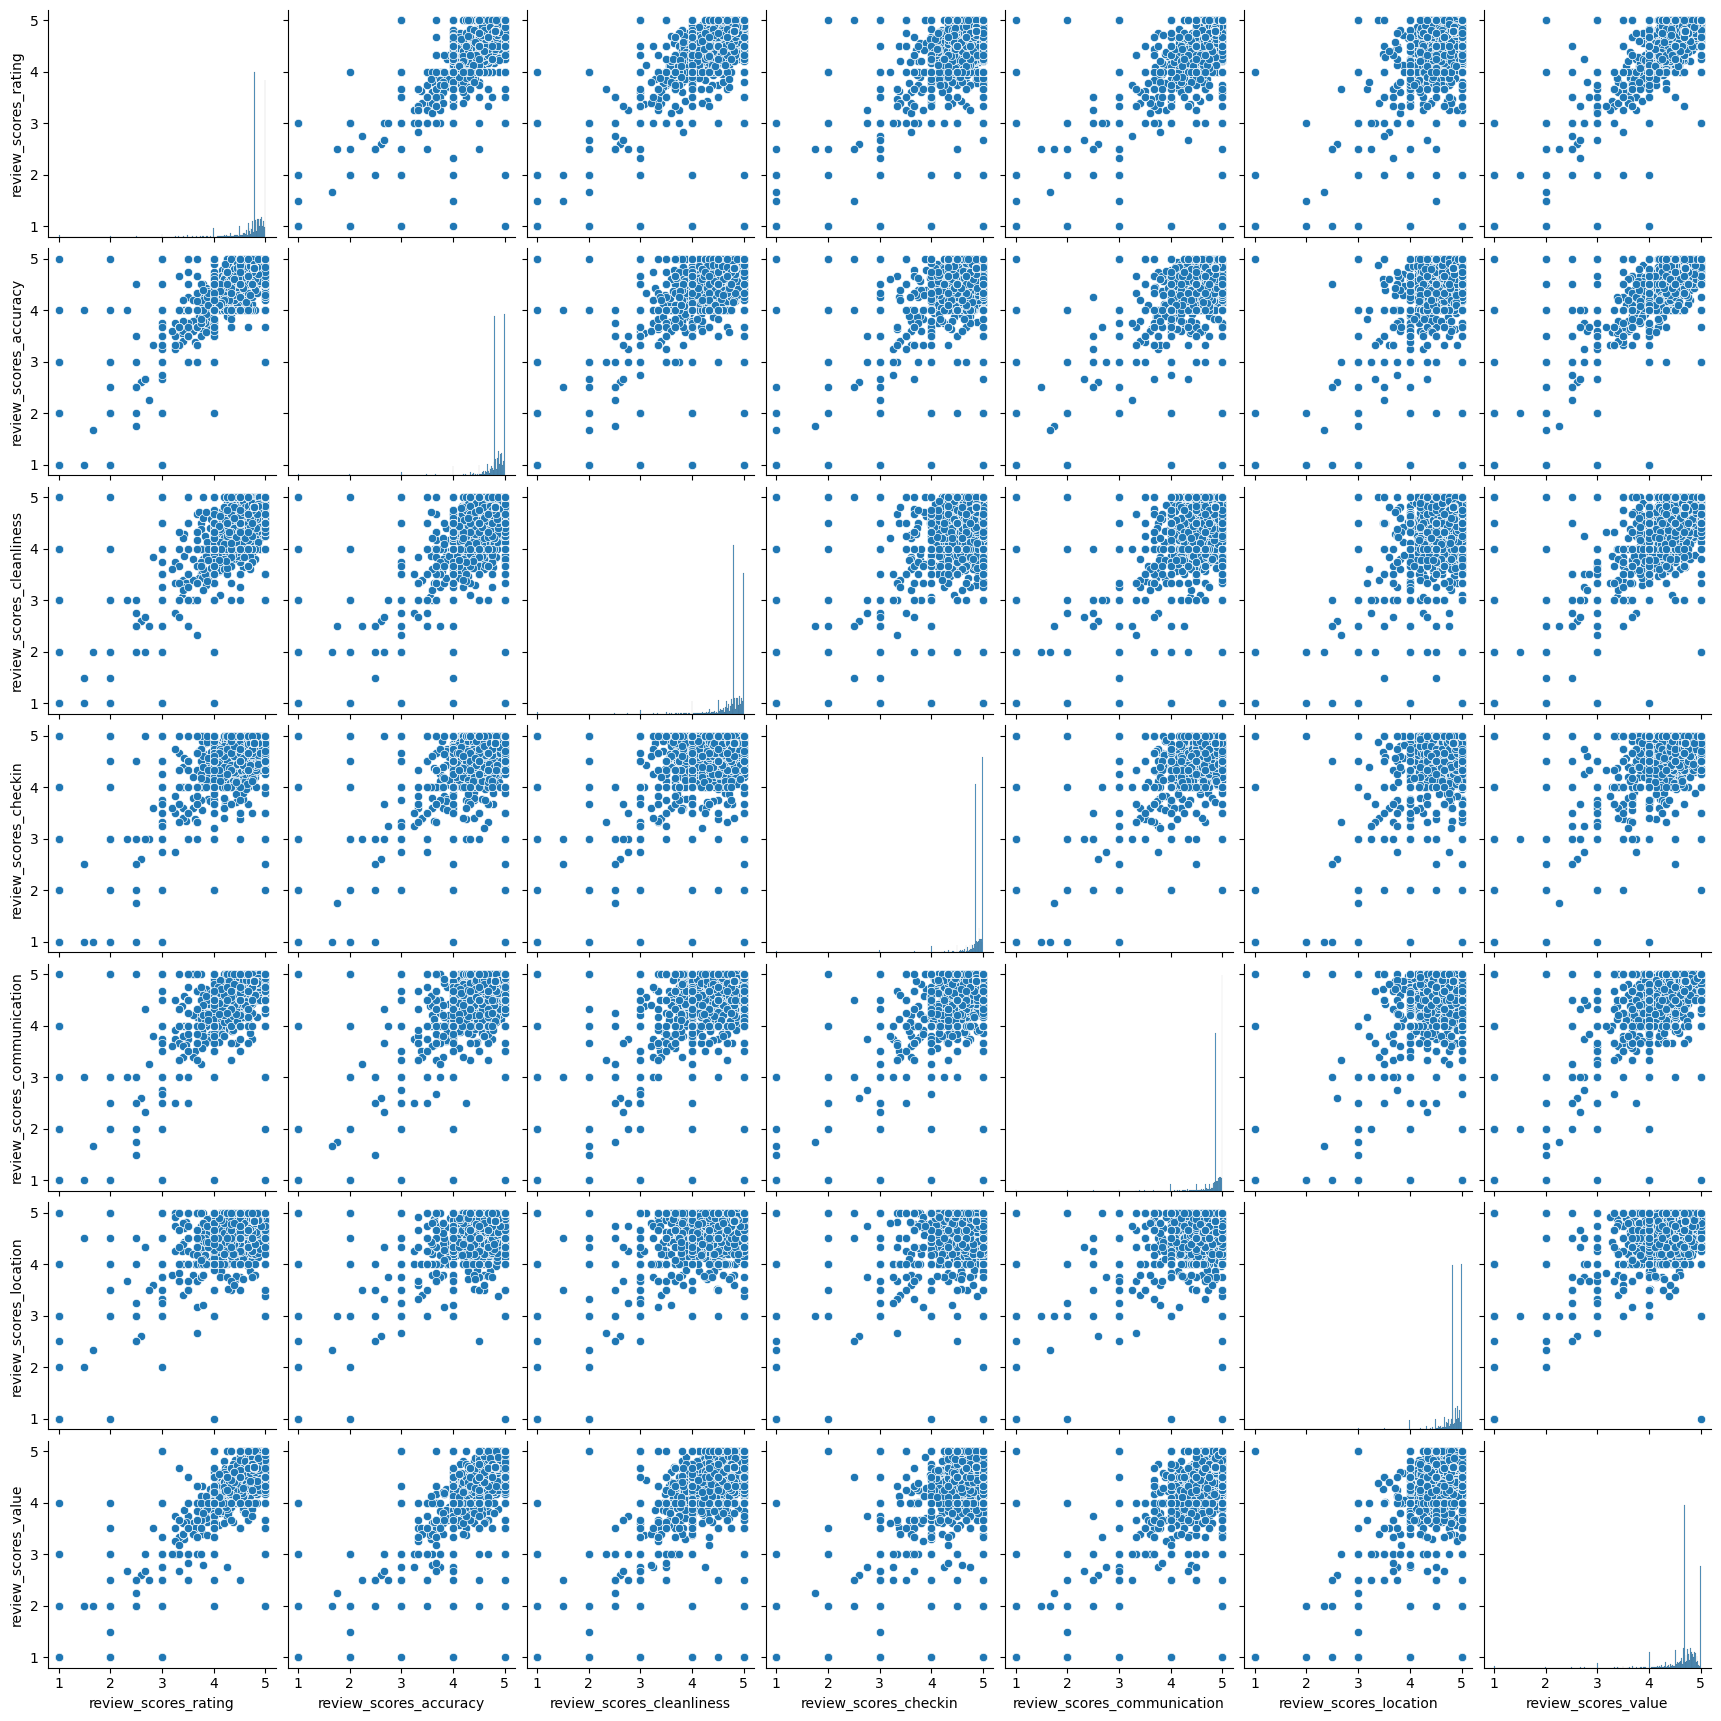

In [43]:
sns.pairplot(sub5)

#### Distribution of Variables:

1. I would want to study distribution of prices. The data seems to be widely spread due to outliers. I want to check features of these outliers.
2. I would also like to check distribution of availability_30, 60, or 90. All these distributions are bi-modal, which is interesting. I would like to check why they are bi-modal.

### Creating Categorical Plots

/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/notebook/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


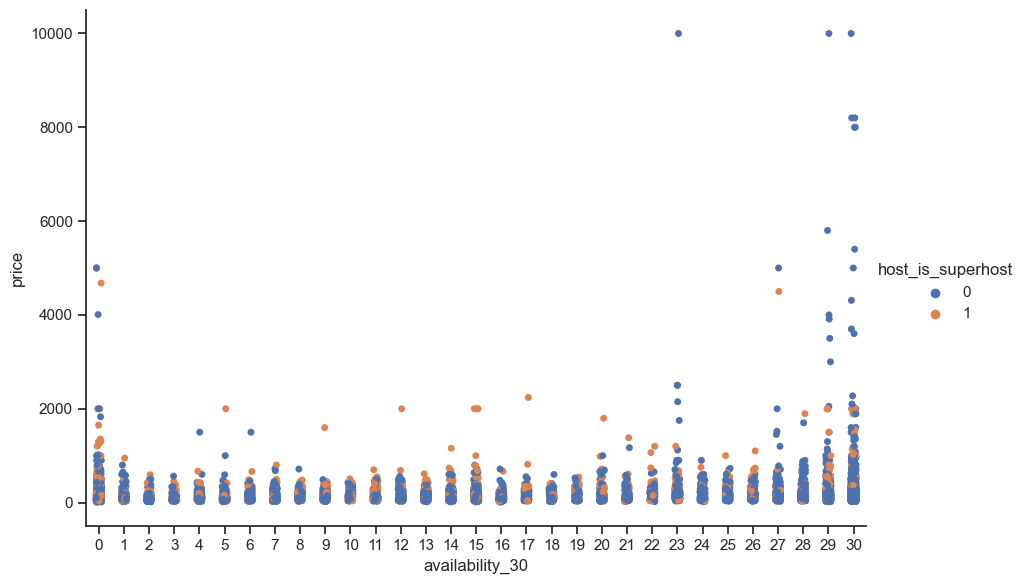

In [44]:
# Create a categorical plot in seaborn using price, accommodates, and room type
sns.set(style="ticks")
g = sns.catplot(x="availability_30", y="price", hue="host_is_superhost", data=toronto_listings_cleaned, height=6, aspect=1.5)

Those who have priced their lisings really high are not superhosts. Both superhosts and non-superhosts have listings available in the next 30 days. However, non-superhosts have more availability in the towards the end of 30 days period.

## 03. Answering Questions

1. *What is the distribution of superhost?*

    Majority of the hosts are not superhost. From the pie chart we can see that about 61% hosts are not superhost and remaining 39% are superhosts.

2. *How are the listings distributed in Toronto? Are certain neighbourhoods have more listings than others?*

   Most of the listings are in Waterfront Communities-The Island. There about 2500 listings in this area more than 4 times the listings in the second most populus neighbourhood.
    
3. *What is the distribution of property type and roomtype in Toronto?*

   Maximum listings are from the categories an entire rental unit, private room in home, condo, and by home. These categories combined have 11909 listings, i.e. 78% of the total listings!
   
4. *Is there any relationship between bedrooms and price?*

   As observed earlier, there is a weak linear relationship between bedrooms and price. This may mean that there are other factors which may be related to price.

   
5. *Are certain neighbourhoods priced more than others?*

   Forest Hill South, Bridle Path-Sunnybrook-York Mills, and Bay Street Corridor have the highest prices.

   
6. *Is there any relationship between property type and price?*

   Entire villa, Shipping container, Entire cottage, Boat, and Earthen home are highly priced. Among all, Entire villa is on averae priced at around $1600 canadian dollars!
   
7. *Is there a certain relationship between number of reviews and price?*

   There is **no relationship** between number of reviews and price.
   

### Forming Hypothesis

Based on the relationships we have observed so far, I have following hypothesis which we may test.

1. There is a difference in average price of a listing, based on number of bedrooms that a listing has.
2. There is a difference in average price of a listing, based on number of bathrooms that a listing has.
3. The average price of Forest Hill South is higher than other neighbourhoods.
4. If a listing has higher number of availability in the next 30 days, then it will have more availability in the next 60 days.
